In [1]:
import pandas as pd
import seaborn as sb
import xlrd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mental_health = pd.read_csv('Data/Student Mental health.csv')

In [3]:
mental_health.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [5]:
mental_health.rename(columns={'Choose your gender':'Gender', 'What is your course?':'Course', 'Your current year of Study':'YearOfStudy', 'Marital status':'MaritalStatus', 'What is your CGPA?':'CGPA','Do you have Depression?':'Depression', 'Do you have Anxiety?':'Anxiety', 'Do you have Panic attack?':'PanicAttack', 'Did you seek any specialist for a treatment?':'Treatment' },inplace=True)

In [6]:
mental_health = mental_health.drop(columns = "Timestamp")

In [7]:
mental_health.head()

,Gender,Age,Course,YearOfStudy,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [8]:
mental_health[mental_health.isnull().any(axis=1)]

,Gender,Age,Course,YearOfStudy,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,Treatment
43,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [9]:
mental_health = mental_health.dropna()
mental_health.isnull().sum()

Gender           0
Age              0
Course           0
YearOfStudy      0
CGPA             0
MaritalStatus    0
Depression       0
Anxiety          0
PanicAttack      0
Treatment        0
dtype: int64

In [10]:
mental_health['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [11]:
# Changing all entries into a lower string
mental_health['Course'] = mental_health['Course'].str.lower()

# Removing unnecessary spaces from the Course and CGPA column
mental_health['Course'] = mental_health['Course'].str.strip()
mental_health['CGPA'] = mental_health['CGPA'].str.strip()

mental_health['Course'].unique()

array(['engineering', 'islamic education', 'bit', 'laws', 'mathemathics',
       'pendidikan islam', 'bcs', 'human resources', 'irkhs',
       'psychology', 'kenms', 'accounting', 'enm', 'marine science',
       'koe', 'banking studies', 'business administration', 'law',
       'kirkhs', 'usuluddin', 'taasl', 'engine', 'ala',
       'biomedical science', 'benl', 'it', 'cts', 'engin', 'econs',
       'mhsc', 'malcom', 'kop', 'human sciences', 'biotechnology',
       'communication', 'diploma nursing', 'radiography', 'fiqh fatwa',
       'diploma tesl', 'fiqh', 'nursing'], dtype=object)

In [12]:
# I replaced each of the courses into similar courses/categories as well as cleaning up some of the spelling
mental_health['Course'].replace({'pendidikan islam': 'education',
                      'laws': 'law',
                      'engine': 'engineering',
                      'engin': 'engineering',
                      'diploma nursing': 'nursing',
                      'bit': 'it',
                      'kirkhs': 'irkhs',
                      'usuluddin': 'irkhs',
                      'fiqh fatwa': 'irkhs',
                      'fiqh': 'irkhs',
                      'human resources': 'human sciences',
                      'econs': 'economics',
                      'kenms': 'economics',
                      'enm': 'economics',
                      'kop': 'pharmacy',
                      'koe': 'education',
                      'benl': 'education',
                      'islamic education': 'education',
                      'mathemathics': 'mathematics',
                      'diploma tesl': 'education',
                      'mhsc': 'human sciences',
                      'taasl': 'education',
                      'ala': 'human sciences',
                      'bcs': 'computer science',
                      'malcom': 'communication'}, inplace=True)

mental_health['Course'].unique()

array(['engineering', 'education', 'it', 'law', 'mathematics',
       'computer science', 'human sciences', 'irkhs', 'psychology',
       'economics', 'accounting', 'marine science', 'banking studies',
       'business administration', 'biomedical science', 'cts',
       'communication', 'pharmacy', 'biotechnology', 'nursing',
       'radiography'], dtype=object)

In [13]:
mental_health['CGPA'].replace({'0 - 1.99': 1,
                    '2.00 - 2.49': 2,
                    '2.50 - 2.99': 3,
                    '3.00 - 3.49': 4,
                    '3.50 - 4.00': 5}, inplace=True)

# I also capitalized the Year column to group all entries that had different spellings.
mental_health ['YearOfStudy'] = mental_health['YearOfStudy'].str.title()

In [14]:
mental_health['Gender'].value_counts()

Gender
Female    75
Male      25
Name: count, dtype: int64

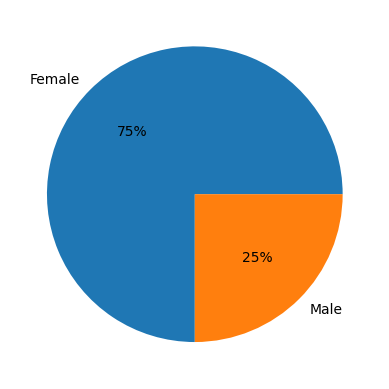

In [15]:
plt.pie(mental_health['Gender'].value_counts(),labels=mental_health['Gender'].unique() , autopct='%.0f%%')
plt.show()

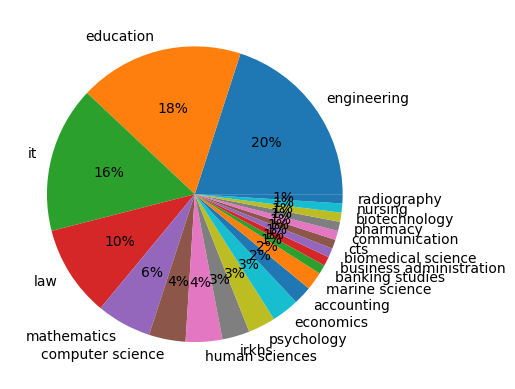

In [16]:
plt.pie(mental_health['Course'].value_counts(),labels=mental_health['Course'].unique() , autopct='%.0f%%')
plt.show()

In [17]:
mental_health

,Gender,Age,Course,YearOfStudy,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,Treatment
0,Female,18.0,engineering,Year 1,4,No,Yes,No,Yes,No
1,Male,21.0,education,Year 2,4,No,No,Yes,No,No
2,Male,19.0,it,Year 1,4,No,Yes,Yes,Yes,No
3,Female,22.0,law,Year 3,4,Yes,Yes,No,No,No
4,Male,23.0,mathematics,Year 4,4,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,computer science,Year 1,5,No,No,Yes,No,No
97,Male,18.0,engineering,Year 2,4,No,Yes,Yes,No,No
98,Female,19.0,nursing,Year 3,5,Yes,Yes,No,Yes,No
99,Female,23.0,education,Year 4,5,No,No,No,No,No


In [18]:
# Created a new column title "Mental Health Issues" and marking a student with either Yes or No for MH Issues
mental_health.loc[(mental_health["Depression"]=="Yes") | (mental_health["Anxiety"]=="Yes") | (mental_health["PanicAttack"]=="Yes"),'Mental Health Issues']= 'Yes'
mental_health.loc[(mental_health["Depression"]=="No") & (mental_health["Anxiety"]=="No") & (mental_health["PanicAttack"]=="No"),'Mental Health Issues']= 'No'


# Creating a dataframe with students who have mental health issues or not
mental_health_yes = mental_health[mental_health["Mental Health Issues"] == 'Yes']
mental_health_no = mental_health[mental_health["Mental Health Issues"] == 'No']

# Showing the count of Students grouped via Mental Health Issues
mental_health.groupby(['Mental Health Issues']).count()

,Gender,Age,Course,YearOfStudy,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,Treatment
Mental Health Issues,,,,,,,,,,
No,36,36,36,36,36,36,36,36,36,36
Yes,64,64,64,64,64,64,64,64,64,64


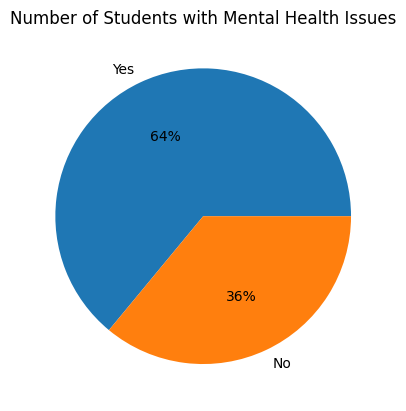

In [19]:
plt.pie(mental_health['Mental Health Issues'].value_counts(),labels=mental_health['Mental Health Issues'].unique() , autopct='%.0f%%')
plt.title('Number of Students with Mental Health Issues')
plt.show()

<Axes: xlabel='CGPA', ylabel='count'>

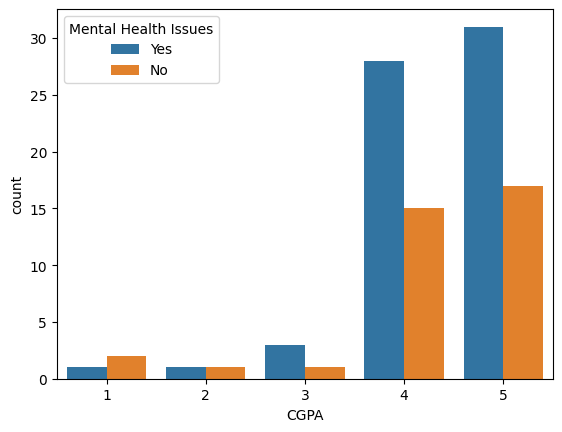

In [20]:
sb.countplot(data=mental_health,x="CGPA",hue=mental_health['Mental Health Issues'])

In [21]:
# Creating a dataframe for students who are Seeking Treatment
student_st = mental_health[mental_health["Treatment"] == 'Yes']

# Getting the avrage of each group.
total_ave = mental_health["CGPA"].mean()
student_mh_ave = mental_health_yes['CGPA'].mean()
student_st_ave = student_st['CGPA'].mean()

print(f'''The average of each total group is:
            Total Students: {total_ave}
            Students with MH Issues: {student_mh_ave}
            Students Seeking Treatment: {student_st_ave}''')

The average of each total group is:
            Total Students: 4.31
            Students with MH Issues: 4.359375
            Students Seeking Treatment: 4.333333333333333


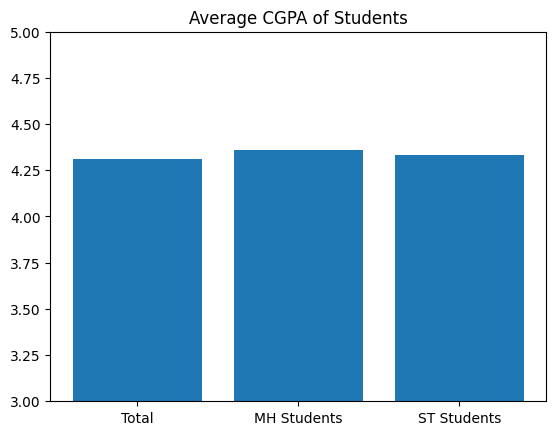

In [22]:
# Simple bar chart of the averages 
x_axis = ['Total', 'MH Students', 'ST Students']
y_axis = [total_ave, student_mh_ave, student_st_ave]
plt.bar(x_axis, y_axis)
plt.ylim([3, 5])
        
plt.title('Average CGPA of Students')
        
plt.show()

In [23]:
# Creating a series where the count of student's MH Issues is grouped by course
mental_health_no_course = mental_health_no.groupby("Course")["Mental Health Issues"].count()
mental_health_yes_course = mental_health_yes.groupby("Course")["Mental Health Issues"].count()

# Sorting from highest to lowest 
mental_health_no_course = mental_health_no_course.sort_values(ascending = False)
mental_health_yes_course = mental_health_yes_course.sort_values(ascending = False)

# Creating a new dataframe for this plot
new_df = pd.concat([mental_health_yes_course, mental_health_no_course], axis=1)

# Renaming the column names
new_df.columns.values[0] = "Has Mental Health Issues"
new_df.columns.values[1] = "No Mental Health Issues"

# Changing the NULL values into 0 and then creating a new column named Total.
new_df.fillna(0, inplace = True)
new_df['Total'] = new_df['Has Mental Health Issues'] + new_df['No Mental Health Issues']

# Sorting
new_df = new_df.sort_values(by=['Total','Has Mental Health Issues', 'No Mental Health Issues'], ascending=False)

new_df = new_df.reset_index(level=0)

new_df.head()

,Course,Has Mental Health Issues,No Mental Health Issues,Total
0,engineering,12.0,8.0,20.0
1,computer science,11.0,7.0,18.0
2,education,11.0,5.0,16.0
3,it,10.0,0.0,10.0
4,irkhs,3.0,3.0,6.0


In [24]:
sb.catplot(x='sex',hue='smoker',data=mental_health,col='Course',kind='count')

ValueError: Could not interpret input 'sex'

In [ ]:
sb.countplot(data=mental_health,x="Course",hue)

In [ ]:
Depression = mental_health.query("Depression== 'Yes'").groupby(['Course']).count()

In [ ]:
Depression

In [ ]:
Course= mental_health['Course'] 

In [ ]:
plt.pie(Depression, labels='Depression', autopct='%.0f%%')
plt.show()

In [ ]:
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()